#### KNN Model

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("emp_attrition.csv")

#### Data Exploration

In [3]:
df

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,Date,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,MonthlyIncome,Attrition
0,33.0,Travel_Frequently,Research & Development,3.0,Life Sciences,1.0,Male,3.0,1.0,Research Scientist,1.0,1.0,7/25/2016 19:04,Yes,11.0,3.0,10.0,3348.0,Yes
1,32.0,Travel_Rarely,Sales,4.0,Medical,4.0,Male,1.0,3.0,Sales Executive,4.0,1.0,8/21/2011 16:29,No,11.0,3.0,14.0,10400.0,Yes
2,40.0,Travel_Rarely,Research & Development,9.0,Life Sciences,4.0,Male,3.0,1.0,Laboratory Technician,1.0,3.0,9/22/2010 6:12,No,14.0,3.0,5.0,2018.0,Yes
3,42.0,Travel_Rarely,Research & Development,7.0,Medical,2.0,Female,4.0,2.0,Research Scientist,2.0,6.0,11/18/2014 11:17,Yes,16.0,3.0,1.0,2372.0,No
4,43.0,Travel_Frequently,Research & Development,27.0,Life Sciences,3.0,Female,3.0,3.0,Manufacturing Director,1.0,8.0,3/9/2011 11:58,No,11.0,3.0,8.0,10820.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,15.0,Travel_Frequently,Research & Development,27.0,Life Sciences,3.0,Female,2.0,2.0,Research Scientist,3.0,2.0,1/20/2014 20:49,No,8.0,2.0,10.0,14708.0,No
21377,5.0,Travel_Frequently,Sales,14.0,Marketing,3.0,Male,2.0,2.0,Human Resources,1.0,4.0,5/25/2016 22:09,Yes,10.0,1.0,6.0,6635.0,No
21378,56.0,Non-Travel,Research & Development,1.0,Marketing,2.0,Male,3.0,2.0,Sales Representative,1.0,1.0,8/19/2016 16:39,Yes,3.0,1.0,12.0,3491.0,No
21379,23.0,Travel_Frequently,Sales,9.0,Marketing,4.0,Male,3.0,1.0,Sales Representative,1.0,1.0,10/7/2015 10:40,No,19.0,3.0,1.0,1790.0,Yes


In [4]:
df.shape

(21381, 19)

In [5]:
df.head(10)

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,Date,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,MonthlyIncome,Attrition
0,33.0,Travel_Frequently,Research & Development,3.0,Life Sciences,1.0,Male,3.0,1.0,Research Scientist,1.0,1.0,7/25/2016 19:04,Yes,11.0,3.0,10.0,3348.0,Yes
1,32.0,Travel_Rarely,Sales,4.0,Medical,4.0,Male,1.0,3.0,Sales Executive,4.0,1.0,8/21/2011 16:29,No,11.0,3.0,14.0,10400.0,Yes
2,40.0,Travel_Rarely,Research & Development,9.0,Life Sciences,4.0,Male,3.0,1.0,Laboratory Technician,1.0,3.0,9/22/2010 6:12,No,14.0,3.0,5.0,2018.0,Yes
3,42.0,Travel_Rarely,Research & Development,7.0,Medical,2.0,Female,4.0,2.0,Research Scientist,2.0,6.0,11/18/2014 11:17,Yes,16.0,3.0,1.0,2372.0,No
4,43.0,Travel_Frequently,Research & Development,27.0,Life Sciences,3.0,Female,3.0,3.0,Manufacturing Director,1.0,8.0,3/9/2011 11:58,No,11.0,3.0,8.0,10820.0,No
5,35.0,Travel_Rarely,Human Resources,8.0,Technical Degree,3.0,Male,3.0,1.0,Human Resources,3.0,1.0,2/3/2013 13:18,No,17.0,3.0,5.0,4323.0,No
6,34.0,Travel_Frequently,Research & Development,3.0,Life Sciences,1.0,Male,3.0,2.0,Healthcare Representative,4.0,0.0,11/20/2013 22:47,No,17.0,3.0,6.0,7756.0,No
7,30.0,Travel_Frequently,Research & Development,2.0,Technical Degree,4.0,Female,2.0,1.0,Research Scientist,NaN,0.0,5/21/2017 16:24,No,16.0,3.0,9.0,4968.0,No
8,37.0,Travel_Rarely,Sales,6.0,Medical,3.0,Male,3.0,2.0,Sales Executive,4.0,4.0,12/30/2017 1:40,No,14.0,3.0,5.0,6502.0,No
9,26.0,Travel_Frequently,Human Resources,17.0,Life Sciences,2.0,Female,3.0,1.0,Human Resources,3.0,0.0,8/4/2013 13:49,Yes,11.0,3.0,7.0,2741.0,Yes


In [6]:
# To view entire columns
pd.set_option("display.max_columns",None)
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,Date,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,MonthlyIncome,Attrition
0,33.0,Travel_Frequently,Research & Development,3.0,Life Sciences,1.0,Male,3.0,1.0,Research Scientist,1.0,1.0,7/25/2016 19:04,Yes,11.0,3.0,10.0,3348.0,Yes
1,32.0,Travel_Rarely,Sales,4.0,Medical,4.0,Male,1.0,3.0,Sales Executive,4.0,1.0,8/21/2011 16:29,No,11.0,3.0,14.0,10400.0,Yes
2,40.0,Travel_Rarely,Research & Development,9.0,Life Sciences,4.0,Male,3.0,1.0,Laboratory Technician,1.0,3.0,9/22/2010 6:12,No,14.0,3.0,5.0,2018.0,Yes
3,42.0,Travel_Rarely,Research & Development,7.0,Medical,2.0,Female,4.0,2.0,Research Scientist,2.0,6.0,11/18/2014 11:17,Yes,16.0,3.0,1.0,2372.0,No
4,43.0,Travel_Frequently,Research & Development,27.0,Life Sciences,3.0,Female,3.0,3.0,Manufacturing Director,1.0,8.0,3/9/2011 11:58,No,11.0,3.0,8.0,10820.0,No


In [7]:
df.describe()

,Age,JobInvolvement,JobLevel,JobSatisfaction,YearsAtCompany
count,21355.000000,21358.000000,21350.000000,21352.000000,21333.000000
mean,30.840834,2.142289,1.926557,2.146028,8.144612
std,15.647045,0.850059,0.820964,0.932168,4.974814
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,1.000000,1.000000,1.000000,4.000000
50%,31.000000,2.000000,2.000000,2.000000,8.000000
75%,43.000000,3.000000,3.000000,3.000000,12.000000
max,60.000000,4.000000,4.000000,4.000000,18.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21381 entries, 0 to 21380
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      21355 non-null  float64
 1   BusinessTravel           21347 non-null  object 
 2   Department               21339 non-null  object 
 3   DistanceFromHome         21334 non-null  object 
 4   EducationField           21353 non-null  object 
 5   EnvironmentSatisfaction  21342 non-null  object 
 6   Gender                   21331 non-null  object 
 7   JobInvolvement           21358 non-null  float64
 8   JobLevel                 21350 non-null  float64
 9   JobRole                  21345 non-null  object 
 10  JobSatisfaction          21352 non-null  float64
 11  NumCompaniesWorked       21333 non-null  object 
 12  Date                     21381 non-null  object 
 13  OverTime                 21333 non-null  object 
 14  PercentSalaryHike     

In [9]:
df.dtypes


Age                        float64
BusinessTravel              object
Department                  object
DistanceFromHome            object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement             float64
JobLevel                   float64
JobRole                     object
JobSatisfaction            float64
NumCompaniesWorked          object
Date                        object
OverTime                    object
PercentSalaryHike           object
PerformanceRating           object
YearsAtCompany             float64
MonthlyIncome               object
Attrition                   object
dtype: object

In [10]:
len(df.isnull().sum())/len(df)*100

0.08886394462373134

As the dataset contains null values less than 5% we will drop all the null values

In [11]:
df=df.dropna(axis=0)
df.shape

(20759, 19)

In [12]:
df.duplicated().value_counts()

False    20513
True       246
dtype: int64

#### Target Variable

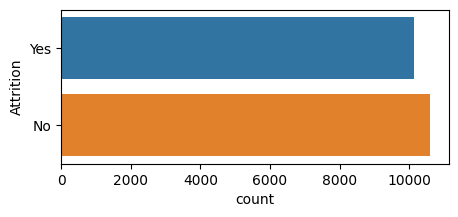

In [13]:
plt.figure(figsize=(5,2))
plt.rc("font",size=10)
sns.countplot(y="Attrition",data=df);

The Target Variable is mostly balanced so we can build the model

##### Ordinal encoding

In [14]:
catcols=df.select_dtypes(include='object').columns
for i in catcols:
    print(i)

BusinessTravel
Department
DistanceFromHome
EducationField
EnvironmentSatisfaction
Gender
JobRole
NumCompaniesWorked
Date
OverTime
PercentSalaryHike
PerformanceRating
MonthlyIncome
Attrition


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in catcols:
    df[i]=le.fit_transform(df[i])

In [16]:
df.dtypes

Age                        float64
BusinessTravel               int32
Department                   int32
DistanceFromHome             int32
EducationField               int32
EnvironmentSatisfaction      int32
Gender                       int32
JobInvolvement             float64
JobLevel                   float64
JobRole                      int32
JobSatisfaction            float64
NumCompaniesWorked           int32
Date                         int32
OverTime                     int32
PercentSalaryHike            int32
PerformanceRating            int32
YearsAtCompany             float64
MonthlyIncome                int32
Attrition                    int32
dtype: object

In [17]:
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,Date,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,MonthlyIncome,Attrition
0,33.0,1,1,23,2,1,1,3.0,1.0,7,1.0,1,16283,1,2,3,10.0,5759,1
1,32.0,2,2,24,4,4,1,1.0,3.0,8,4.0,1,17819,0,2,3,14.0,268,1
2,40.0,2,1,29,2,4,1,3.0,1.0,2,1.0,3,19567,0,5,3,5.0,4744,1
3,42.0,2,1,27,4,2,0,4.0,2.0,7,2.0,7,3965,1,7,3,1.0,5023,0
4,43.0,1,1,20,2,3,0,3.0,3.0,5,1.0,9,10233,0,2,3,8.0,548,0


##### HeatMap

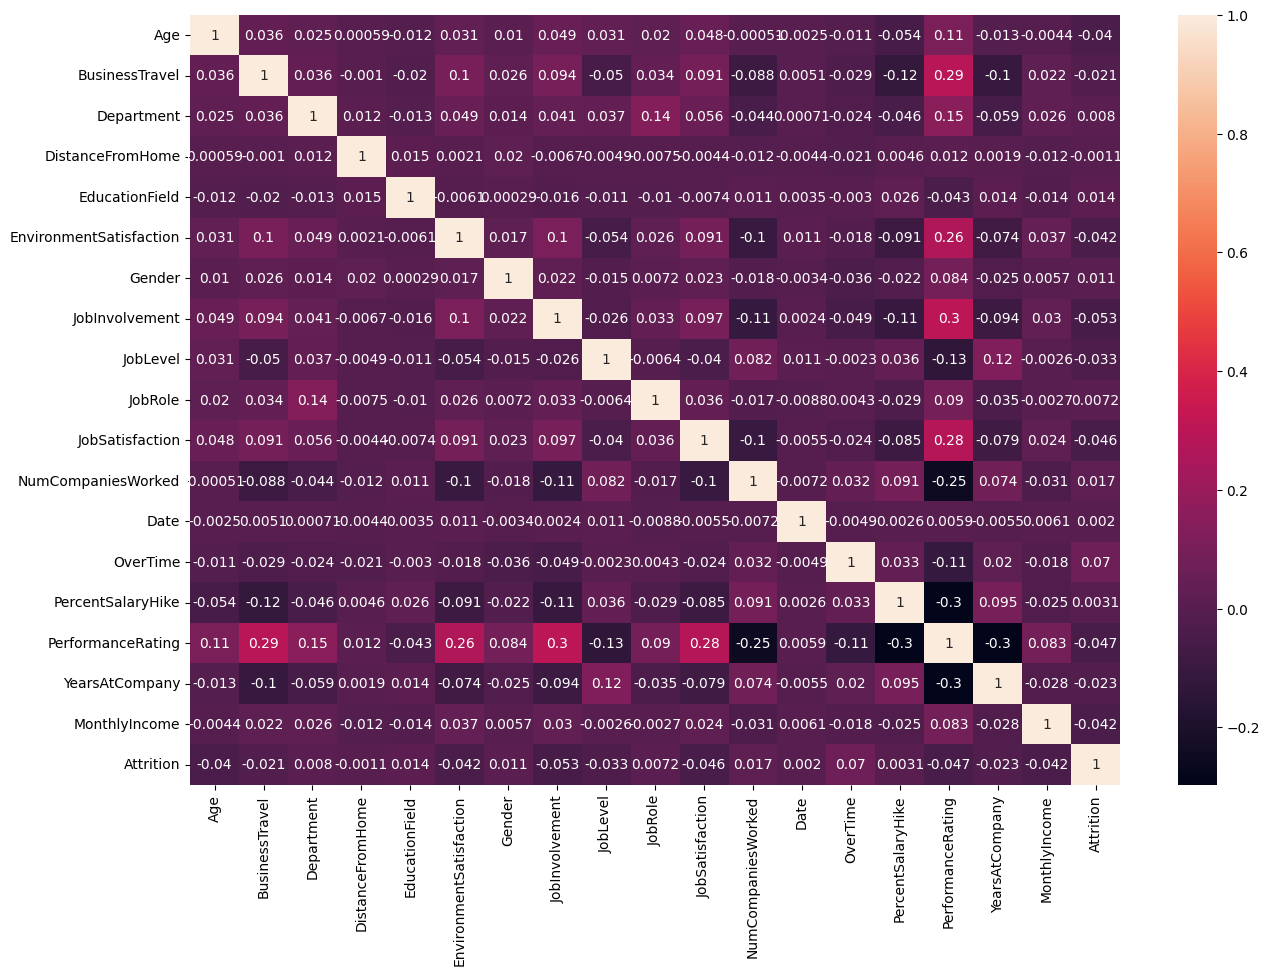

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

In [18]:
X=df.drop(['Attrition'],axis=1)
y=df["Attrition"]

#### Splitting the data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [21]:
from sklearn.metrics import classification_report ,confusion_matrix ,accuracy_score

##### Model building KNN

##### Model 1

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =51.62%


##### Model 3

In [40]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =51.25%


##### Model 3

In [42]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =50.67%


##### Model 4

In [43]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =51.83%


#### Model Evaluation

In [45]:
y_pred=knn.predict(X_test)
print(f"Classification report:\n\n {classification_report(y_test,y_pred)}")

Classification report:

               precision    recall  f1-score   support

           0       0.52      0.72      0.60      2623
           1       0.52      0.31      0.39      2567

    accuracy                           0.52      5190
   macro avg       0.52      0.52      0.50      5190
weighted avg       0.52      0.52      0.50      5190



In [46]:
knn_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n\n{knn_matrix}")

Confusion Matrix:

[[1893  730]
 [1770  797]]


In [47]:
print(f"Accuracy Score:\n\n{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Score:

51.83%
